# Project part 2 - Report

You have been asked to investigate transcriptomic differences between naive B cells of young and old mice to understand how resistance to infection may differ between the age groups. Your staff has performed a thorough computational analysis, which they've forwarded to you so that you can write the report describing your findings. Their results, and space for you to write your summary, are included below.

In [1]:
# import modules
from datascience import *
import numpy as np
import random
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.stats
import pandas as pd
import sklearn
import statsmodels
from statsmodels import stats
from statsmodels.stats import multitest
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from collections import Counter

In [2]:
# Load data
sc_meta = pd.read_csv('marrow_naive_B_meta.csv', index_col = 0)
sc_data = pd.read_csv('marrow_naive_B_exp.csv', index_col = 0)
sc_meta.head()

,cell_ontology_class,mouse.id,sex,age
cell,,,,
A10_B002327,naive B cell,24_59_M,male,24m
A11_B002327,naive B cell,24_59_M,male,24m
A13_B002327,naive B cell,24_59_M,male,24m
A15_B002327,naive B cell,24_59_M,male,24m
A17_B002327,naive B cell,24_59_M,male,24m


## Data preparation

In [3]:
Counter(sc_meta.age), Counter(sc_meta.sex), Counter(sc_meta.cell_ontology_class)

(Counter({'24m': 784, '3m': 401}),
 Counter({'male': 1185}),
 Counter({'naive B cell': 1185}))

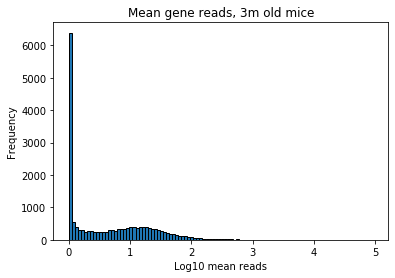

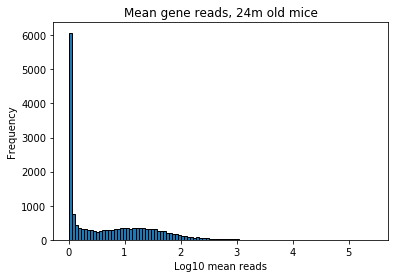

In [4]:
plt.hist(np.log10(np.mean(sc_data.loc[:,sc_meta.age == '3m'], axis = 1)+1), bins = 100)
plt.xlabel('Log10 mean reads')
plt.ylabel('Frequency')
plt.title('Mean gene reads, 3m old mice')
plt.show()
plt.hist(np.log10(np.mean(sc_data.loc[:,sc_meta.age == '24m'], axis = 1)+1), bins = 100)
plt.xlabel('Log10 mean reads')
plt.ylabel('Frequency')
plt.title('Mean gene reads, 24m old mice')
plt.show()

In [5]:
genes_to_keep = (np.log10(np.mean(sc_data.loc[:,sc_meta.age == '3m'], axis = 1)+1) > 1) | (np.log10(np.mean(sc_data.loc[:,sc_meta.age == '24m'], axis = 1)+1) > 1)
exp_sub = sc_data.loc[genes_to_keep,:]

sc_total_med = exp_sub.sum().median()
sc_data_norm = exp_sub / exp_sub.sum() * sc_total_med

### Explain what pre-processing steps or checks were used and why:

## Exploratory data analysis

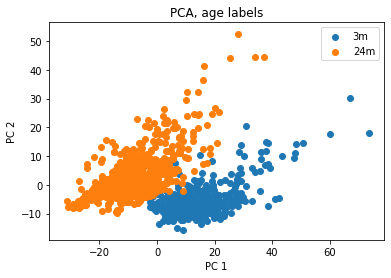

In [6]:
# EDA
x = StandardScaler().fit_transform(np.log2(sc_data_norm.T+1))
pca = PCA(n_components = 100)
principalComponents = pca.fit_transform(x)

plt.scatter(principalComponents[sc_meta['age'] == '3m',0], principalComponents[sc_meta['age'] == '3m',1])
plt.scatter(principalComponents[sc_meta['age'] == '24m',0], principalComponents[sc_meta['age'] == '24m',1])
plt.legend(['3m', '24m'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA, age labels')
plt.show()

In [7]:
tsne = TSNE(n_components = 2)
X_embedded = tsne.fit_transform(principalComponents)

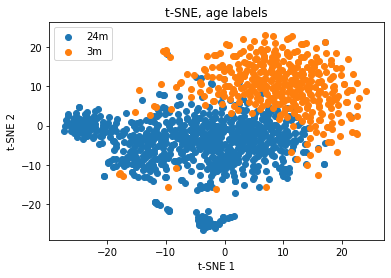

In [8]:
ages = np.unique(sc_meta['age'])
for x in ages:
    plt.scatter(X_embedded[sc_meta['age'] == x,0], X_embedded[sc_meta['age'] == x,1])
plt.legend(ages)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE, age labels')
plt.show()

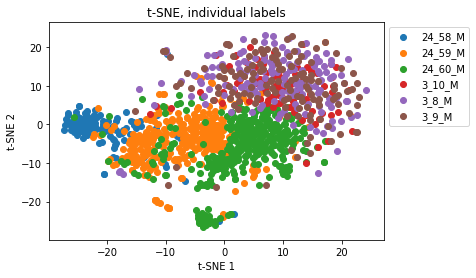

In [9]:
indivs = np.unique(sc_meta['mouse.id'])
for x in indivs:
    plt.scatter(X_embedded[sc_meta['mouse.id'] == x,0], X_embedded[sc_meta['mouse.id'] == x,1])
plt.legend(indivs, bbox_to_anchor = (1,1))
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE, individual labels')
plt.show()

### Interpret the exploratory results from dimension reduction:

## Differential expression

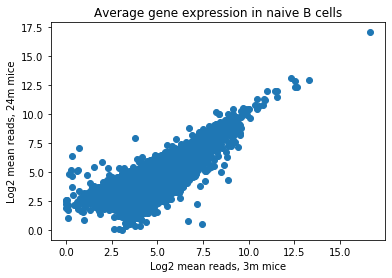

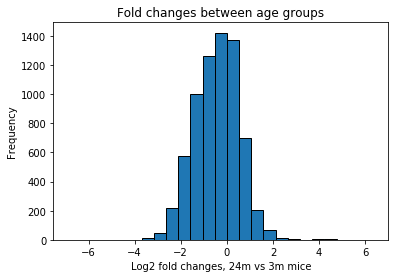

In [10]:
# Differential expression, GO
young_mice = sc_meta['age'] == '3m'
old_mice = sc_meta['age'] == '24m'

young_exp = sc_data_norm.loc[:, young_mice]
old_exp = sc_data_norm.loc[:, old_mice]

plt.scatter(np.log2(np.mean(young_exp, axis = 1)+1), np.log2(np.mean(old_exp, axis = 1)+1))
plt.xlabel('Log2 mean reads, 3m mice')
plt.ylabel('Log2 mean reads, 24m mice')
plt.title('Average gene expression in naive B cells')
plt.show()

log2_fcs = np.log2(np.mean(old_exp, axis = 1)+1) - np.log2(np.mean(young_exp, axis = 1)+1)
plt.hist(log2_fcs, bins = 25)
plt.xlabel('Log2 fold changes, 24m vs 3m mice')
plt.ylabel('Frequency')
plt.title('Fold changes between age groups')
plt.show()

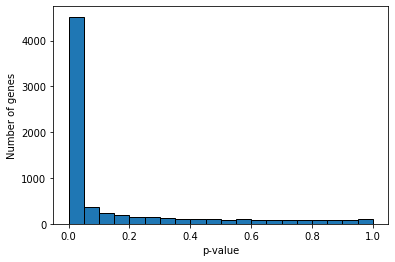

4309

In [11]:
gene_p_vals = []
for x in np.arange(sc_data_norm.shape[0]):
    p_val = scipy.stats.mannwhitneyu(young_exp.iloc[x,:], old_exp.iloc[x,:], alternative = 'two-sided')[1]
    gene_p_vals.append(p_val)
    
plt.hist(gene_p_vals, bins = 20)
plt.xlabel('p-value')
plt.ylabel('Number of genes')
plt.title('')
plt.show()

# Compute the number of genes which are differentially expressed (p-value less than or equal to 0.05)
q_vector = stats.multitest.multipletests(gene_p_vals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
n_de = sum(q_vector <= 0.05)
n_de

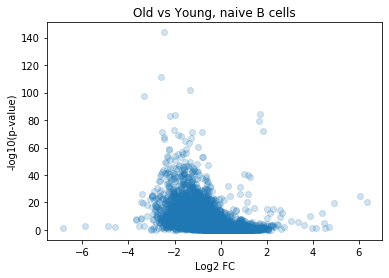

In [12]:
log_p_vals = -np.log10(gene_p_vals)

plt.scatter(log2_fcs, log_p_vals, alpha=0.2)
plt.xlabel('Log2 FC')
plt.ylabel('-log10(p-value)')
plt.title('Old vs Young, naive B cells')
plt.show()

### Summarize the outcome of your differential expression testing:

## Conclusion

### What do you conclude about whether there is a difference in ages? If there is any, how would you describe it?

# Submit

In [ ]:
from client.api.notebook import Notebook

In [ ]:
ok = Notebook('Project02_Report.ok')
_ = ok.auth(inline=True)

In [ ]:
# Submit the assignment.
_ = ok.submit()